# Forecast ADR e OCC - Com Prophet

In [8]:
import pandas as pd 
import numpy as np

df = pd.read_csv('df_ok.csv')
df.head()

,data,dia_semana,adr,occ
0,2022-01-01,6,186.612727,34.375000
1,2022-01-02,0,183.996667,37.500000
2,2022-01-03,1,193.209500,41.666667
3,2022-01-04,2,184.547609,47.916667
4,2022-01-05,3,184.261111,56.250000


In [10]:
df.isnull().sum()

data          0
dia_semana    0
adr           0
occ           0
dtype: int64

### Comportamento da OCC aos dias de semana:

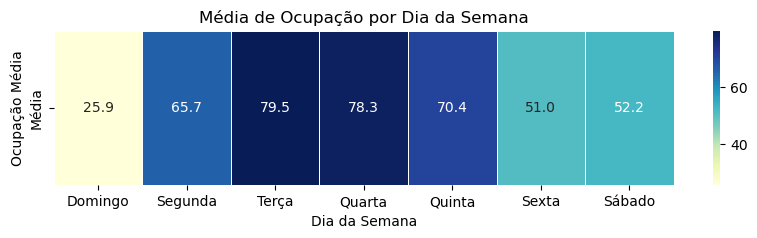

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

media_occ_semana = df.groupby('dia_semana')['occ'].mean()

heatmap = pd.DataFrame(media_occ_semana).T
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5,
            xticklabels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'],
            yticklabels=['Média']) # Add labels for x and y axis
plt.title('Média de Ocupação por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Ocupação Média')
plt.show()

### Tendência da ADR:

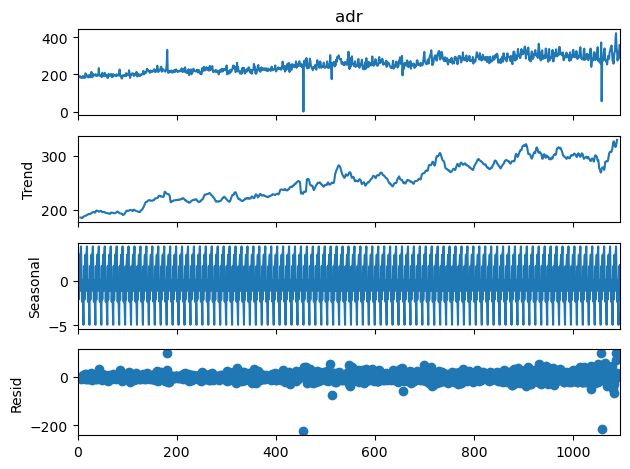

In [24]:
import statsmodels.api as sm
dec = sm.tsa.seasonal_decompose(df['adr'], period=12, model='additive').plot()
plt.show()

### Prevendo a OCC:

22:30:02 - cmdstanpy - INFO - Chain [1] start processing
22:30:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 11.915647882091466
MSE: 243.11225845154573
RMSE: 15.592057543876168
R²: 0.6007101285984457


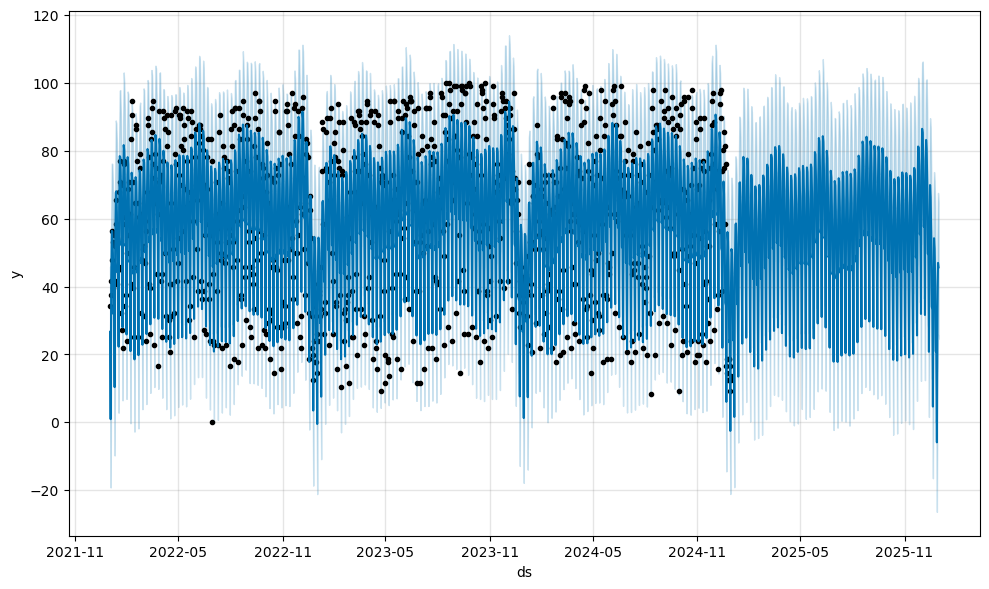

In [8]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparação dos dados para Prophet
df_occ = df[['data', 'occ']].rename(columns={'data': 'ds', 'occ': 'y'})

# Modelo Prophet
model_occ = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_occ.fit(df_occ)

# Criando datas futuras para prever (próximos 365 dias)
future_occ = model_occ.make_future_dataframe(periods=365)
forecast_occ = model_occ.predict(future_occ)

# Visualizando a previsão
model_occ.plot(forecast_occ)

# Calculando as métricas com o dataframe correto (df_occ)
mae = mean_absolute_error(df_occ['y'], forecast_occ['yhat'][:len(df_occ)])
mse = mean_squared_error(df_occ['y'], forecast_occ['yhat'][:len(df_occ)])
rmse = np.sqrt(mse)
r2 = r2_score(df_occ['y'], forecast_occ['yhat'][:len(df_occ)])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

### Prevendo a ADR

22:30:36 - cmdstanpy - INFO - Chain [1] start processing
22:30:36 - cmdstanpy - INFO - Chain [1] done processing


MAE (Erro Médio Absoluto): 11.794929206308314
MSE (Erro Médio Quadrático): 351.99929816579686
R² (Coeficiente de Determinação): 0.7938535242624178


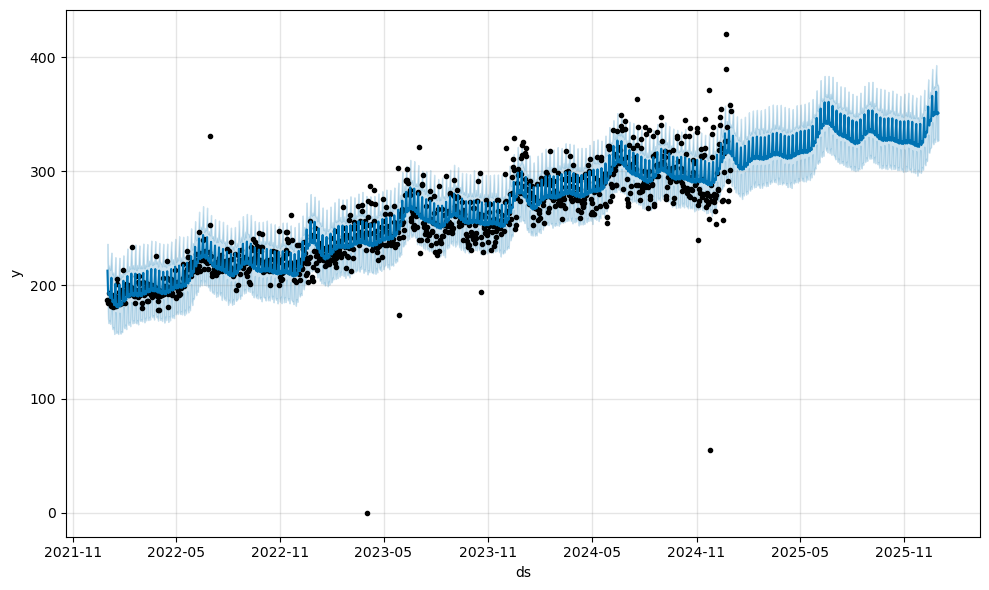

In [10]:
# Preparação dos dados para Prophet
df_prophet = df[['data', 'adr']].rename(columns={'data': 'ds', 'adr': 'y'})

# Inicializando e ajustando o modelo
model_adr_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_adr_prophet.fit(df_prophet)

# Criando datas futuras para previsão (próximos 365 dias)
future_adr = model_adr_prophet.make_future_dataframe(periods=365)
forecast_adr = model_adr_prophet.predict(future_adr)

# Visualizando a previsão
model_adr_prophet.plot(forecast_adr)

# Calculando as métricas
mae = mean_absolute_error(df_prophet['y'], forecast_adr['yhat'][:len(df_prophet)])
mse = mean_squared_error(df_prophet['y'], forecast_adr['yhat'][:len(df_prophet)])
r2 = r2_score(df_prophet['y'], forecast_adr['yhat'][:len(df_prophet)])

# Exibindo os resultados
print(f"MAE (Erro Médio Absoluto): {mae}")
print(f"MSE (Erro Médio Quadrático): {mse}")
print(f"R² (Coeficiente de Determinação): {r2}")